In [274]:
# load necessary libraries


# Standard library
from io import BytesIO

# 3rd party
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from  matplotlib import colors, patches
from matplotlib.font_manager import FontProperties
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.ticker import FormatStrFormatter, FuncFormatter
import matplotlib.dates as mdates
from matplotlib.patches import Polygon


from matplotlib.path import Path
from matplotlib.patches import PathPatch


import datetime

import numpy as np
import pandas as pd

In [331]:
# test dictionary


dict1={
    'chart_size': {
        'width': 800,
        'height': 400
    },

    'title': {
        'text': 'Title',
        'font': 'serif',
        'size': 20,
        'color': '#666666',
        'anchor': 'center'
    },

    'subtitle': {
        'text': 'subtitle',
        'font': 'serif',
        'size': 10,
        'color': '#666666',
        'anchor': 'center'
    },

    'borders': {
        'left':None,# {
           # 'color': 'green',
          #  'size': 2
        # },

        'right': {
            'color': '#666666',
            'size': 2
         },

        'top': None,
        'bottom': {
            'color': '#666666',
            'size': 2
         },
    },

    'legend': {
        'anchor': 'upper right',
        'font': 'serif',
        'size': 10,
        'color': 'black'
    },

    'x_axis': {
        'text': 'X axis',
        'font': 'serif',
        'size': 14,
        'color': 'blue',
        'anchor': 'center',
        'rotate': 45,

        'grid_lines':  {
            'color': '#666666',
            'size': 1,
            'style': 'solid',
            'on_top': False 
        },

        'major_ticks': {
            'color': '#666666'
        },

        'minor_ticks': None
        
        
   
    },
    
    
    'y_axis': {
        'text': 'Y axis',
        'font': 'serif',
        'size': 14,
        'color': '#666666',
        'anchor': 'center',
        'rotate': 0,

        'grid_lines':  {
            'color': '#666666',
            'size': 1,
            'style': 'solid',
            'on_top': True 
        },

        'major_ticks': {
            'color': '#666666'
        },

        'minor_ticks': {
            'color': '#666666'
        }
    },

    
  'y2_axis': {
        'text': 'Y2 axis',
        'font': 'serif',
        'size': 14,
        'color': '#666666',
        'anchor': 'bottom',
        'rotate': 0,

        'grid_lines':  {
            'color': '#666666',
            'size': 1,
            'style': 'dashed',
            'on_top': True 
        },

        'major_ticks': {
            'color': '#666666'
        },

        'minor_ticks': {
            'color': '#666666'
        }
    },


    
    
    'series': [
       #  eg. 1st series - area plot
        {
            
            'area_plot': {
                'series_name': 'Thermal Capacity',
               'y-axis': 'primary',
               'gradient': 'linear',
                'start_color': '#D5ECEC',
                'stop_color': '#316C6C',
                'line_style': {
                    'color': 'red',
                    'size': 2
                },
                'data': [
                   
                     ]
           }
        },

        # eg. 2nd series - line plot
        {
                'line_plot': {
                'series_name': 'Thermal Capacity 1',
                'y-axis': 'primary',
                'color': 'gray',
                'size': 2.25,
                'data': [
                    
                ]
            }
        },
    ]
    
    

    
     
        


}


In [332]:
# load data from file

from numpy import genfromtxt
df = pd.read_csv('data.csv', header=None)

df[0]=pd.to_datetime(df[0])


x=df[0].to_numpy()
y=df[1].to_numpy()

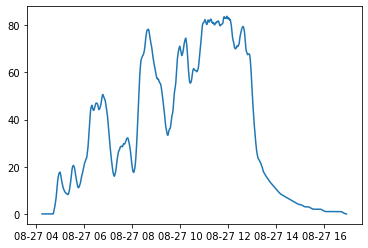

In [211]:
plt.plot(x,y)

In [333]:
# populate dictionary with data for two traces

from numpy import random

l=[]
l1=[]
for i in range(0,len(x)):
    l.append((x[i],y[i]))
    l1.append((x[i],y[i]+10+2*random.randn()))
dict1['series'][0]['area_plot']['data']=l
dict1['series'][1]['line_plot']['data']=l1


#dict1

In [347]:
# class for plotting

class Chart(object):
    #-----------------------------------------------------------------------------   
    #constructor
        
    def __init__(self,dict):
        
        self.dict=dict
        
        self.nseries=len(dict['series'])
        self.dpi=100
        
        # Setup figure size (wxh) in inches (dpi is for PNG generation)
              
        self.fig=plt.figure(figsize=(self.dict['chart_size']['width']/self.dpi,
                                self.dict['chart_size']['height']/self.dpi),
                       dpi=self.dpi)
        
        self.canvas = FigureCanvasAgg(self.fig)
        
        
        
        
        # add axes, last parameter is not 1 to have proper display of subtitle
        self.ax=self.fig.add_axes([0.1,0.3,0.8,0.5])
        
        # check if there are traces associated with secondary axis
        self.ax2b=False
        
        for s in self.dict['series']:
            if 'line_plot' in s:
                if s['line_plot']['y-axis']=='secondary':
                    self.ax2b=True
                
            if 'area_plot' in s:
                if s['area_plot']['y-axis']=='secondary':
                    self.ax2b=True
                        
        if self.ax2b: self.ax2 = self.ax.twinx()
        

        # Create an Agg canvas for rendering
        self.canvas = FigureCanvasAgg(self.fig)

        
    #-----------------------------------------------------------------------------   
    
    #format title    
    def format_title(self):
        title=self.dict['title']
            
        if self.dict['title']!=None:
            
            if title['anchor']=='center':
                x0 = 0.5
            if title['anchor']=='right':
                x0 = 1
            if title['anchor']=='left':
                x0 = 0
            
          
      #      self.fig.suptitle(
       #         title['text'],
      #          color=title['color'],
       #        size=title['size'],
       #        family=title['font'],
        #       x=x0,y=1.2
        #       )
            
            
            plt.figtext(x0,0.9,title['text'], fontsize=title['size'],family=title['font'],color=title['color'], ha='center')
            
            
         
            
    #-----------------------------------------------------------------------------   
            
    # format subtitle    
    def format_subtitle(self):
        if self.dict['subtitle']!=None:
            subtitle=self.dict['subtitle']
            
            if subtitle['anchor']=='center':
                x0= (self.fig.subplotpars.right + self.fig.subplotpars.left)/2
            if subtitle['anchor']=='right':
                x0 = 1
            if subtitle['anchor']=='left':
                x0 = 0
                
          #  self.ax.set_title(
           #     subtitle['text'],
          #      loc=subtitle['anchor'],
           #     color=subtitle['color'],
           #     size=subtitle['size'],
           #     family=subtitle['font'],
           #     x=x0
           #     )
            
            plt.figtext(x0,0.85,subtitle['text'], fontsize=subtitle['size'],family=subtitle['font'],color=subtitle['color'], ha='center')
            
            
       
    #-----------------------------------------------------------------------------   
              
    # format borders
    def format_borders(self):
        
        if self.dict['borders']['left']!=None:
            self.ax.spines['left'].set_color(self.dict['borders']['left']['color'])
            self.ax.spines['left'].set_linewidth(self.dict['borders']['left']['size'])
            if self.ax2b:
                self.ax2.spines['left'].set_color(self.dict['borders']['left']['color'])
                self.ax2.spines['left'].set_linewidth(self.dict['borders']['left']['size'])
        else:
            self.ax.spines['left'].set_visible(False)
            if self.ax2b:
                self.ax2.spines['left'].set_visible(False)
                
        if self.dict['borders']['right']!=None:
            self.ax.spines['right'].set_color(self.dict['borders']['right']['color'])
            self.ax.spines['right'].set_linewidth(self.dict['borders']['right']['size'])
            if self.ax2b:
                self.ax2.spines['right'].set_color(self.dict['borders']['right']['color'])
                self.ax2.spines['right'].set_linewidth(self.dict['borders']['right']['size'])
        else:
            self.ax.spines['right'].set_visible(False)
            if self.ax2b:
                self.ax2.spines['right'].set_visible(False) 
            
        if self.dict['borders']['top']!=None:
            self.ax.spines['top'].set_color(self.dict['borders']['top']['color'])
            self.ax.spines['top'].set_linewidth(self.dict['borders']['top']['size'])
            if self.ax2b:
                self.ax2.spines['top'].set_color(self.dict['borders']['top']['color'])
                self.ax2.spines['top'].set_linewidth(self.dict['borders']['top']['size'])
        else:
            self.ax.spines['top'].set_visible(False)
            if self.ax2b:
                self.ax2.spines['top'].set_visible(False) 
            
        if self.dict['borders']['bottom']!=None:
            self.ax.spines['bottom'].set_color(self.dict['borders']['bottom']['color'])
            self.ax.spines['bottom'].set_linewidth(self.dict['borders']['bottom']['size'])
            if self.ax2b:
                self.ax2.spines['bottom'].set_color(self.dict['borders']['bottom']['color'])
                self.ax2.spines['bottom'].set_linewidth(self.dict['borders']['bottom']['size'])
        else:
            self.ax.spines['bottom'].set_visible(False)
            if self.ax2b:
                self.ax2.spines['bottom'].set_visible(False)
  
    #-----------------------------------------------------------------------------   
              
    # format x axis
    def format_x_axis(self):
        if self.dict['x_axis']['text']!=None:
            self.ax.set_xlabel(
                self.dict['x_axis']['text'],
                family=self.dict['x_axis']['font'],
                fontsize=self.dict['x_axis']['size'],
                color=self.dict['x_axis']['color'],
                va=self.dict['x_axis']['anchor'],
                labelpad=20
                )
        self.ax.tick_params(axis='x', rotation=self.dict['x_axis']['rotate'])
        
        if self.dict['x_axis']['major_ticks']!=None:
            self.ax.tick_params(axis='x', which='major', color=self.dict['x_axis']['major_ticks']['color'])
        else:
            self.ax.tick_params(axis='x', which='major', bottom = False, top = False)
            
        if self.dict['x_axis']['minor_ticks']!=None:
            self.ax.tick_params(axis='x', which='minor', color=self.dict['x_axis']['minor_ticks']['color'])
        else:
            self.ax.tick_params(axis='x', which='minor', bottom = False, top = False)
     #-----------------------------------------------------------------------------   
              
     # format y axis
    
    def format_y_axis(self):
        if self.dict['y_axis']['text']!=None:
            self.ax.set_ylabel(
                self.dict['y_axis']['text'],
                family=self.dict['y_axis']['font'],
                fontsize=self.dict['y_axis']['size'],
                color=self.dict['y_axis']['color'],
                va=self.dict['y_axis']['anchor'],
                labelpad=20,
                zorder=101
                )
            
        
        self.ax.tick_params(axis='y', rotation=self.dict['y_axis']['rotate'])
        
        if self.dict['y_axis']['major_ticks']!=None:
            self.ax.tick_params(axis='y', which='major', color=self.dict['y_axis']['major_ticks']['color'])
        else:
            self.ax.tick_params(axis='y', which='major', bottom = False, top = False)
            
        if self.dict['y_axis']['minor_ticks']!=None:
            self.ax.tick_params(axis='y', which='minor', color=self.dict['y_axis']['minor_ticks']['color'])
        else:
            self.ax.tick_params(axis='y', which='minor', bottom = False, top = False)

      

     #-----------------------------------------------------------------------------   
              
     # format y2 axis    
    
    
    def format_y2_axis(self):
        if self.ax2b:  
            if self.dict['y2_axis']['text']!=None:
                self.ax2.set_ylabel(
                    self.dict['y2_axis']['text'],
                    family=self.dict['y2_axis']['font'],
                    fontsize=self.dict['y2_axis']['size'],
                    color=self.dict['y2_axis']['color'],
                    va=self.dict['y2_axis']['anchor'],
                    labelpad=20
                    )
            self.ax2.tick_params(axis='y', rotation=self.dict['y2_axis']['rotate'])
        
            if self.dict['y2_axis']['major_ticks']!=None:
                self.ax2.tick_params(axis='y', which='major', color=self.dict['y2_axis']['major_ticks']['color'])
            else:
                self.ax2.tick_params(axis='y', which='major', bottom = False, top = False)
            
            if self.dict['y2_axis']['minor_ticks']!=None:
                self.ax2.tick_params(axis='y', which='minor', color=self.dict['y2_axis']['minor_ticks']['color'])
            else:
                self.ax2.tick_params(axis='y', which='minor', bottom = False, top = False)

   
    #-----------------------------------------------------------------------------   
              
    # add gridlines   
           
    def add_gridlines(self):
        if self.dict['x_axis']['grid_lines']!=None:
            if self.dict['x_axis']['grid_lines']['on_top']:
                z=5
            else:
                z=0
                
            self.ax.grid(
                axis='x',
                color=self.dict['x_axis']['grid_lines']['color'],
                linewidth=self.dict['x_axis']['grid_lines']['size'],
                linestyle=self.dict['x_axis']['grid_lines']['style'],
                )
                     
            
            lines = self.ax.xaxis.get_gridlines().copy()
            #ax.grid(False)
            for l in lines:
                self.ax.add_line(l)
                l.set_zorder(z)
        
        if self.dict['y_axis']['grid_lines']!=None:
            if self.dict['y_axis']['grid_lines']['on_top']:
                z=5
            else:
                z=0
                
            self.ax.grid(
                axis='y',
                color=self.dict['y_axis']['grid_lines']['color'],
                linewidth=self.dict['y_axis']['grid_lines']['size'],
                linestyle=self.dict['y_axis']['grid_lines']['style'],
                )
                     
            
            lines = self.ax.yaxis.get_gridlines().copy()
            #ax.grid(False)
            for l in lines:
                self.ax.add_line(l)
                l.set_zorder(z)
                
    
    
        if self.dict['y2_axis']['grid_lines']!=None:
            if self.dict['y2_axis']['grid_lines']['on_top']:
                z=5
            else:
                z=0
                
                
                
            if self.ax2b:
                
                self.ax2.grid(
                    axis='y',
                    color=self.dict['y2_axis']['grid_lines']['color'],
                    linewidth=self.dict['y2_axis']['grid_lines']['size'],
                    linestyle=self.dict['y2_axis']['grid_lines']['style'],
                    )
                     
            
                lines = self.ax2.yaxis.get_gridlines().copy()
            
                for l in lines:
                    self.ax2.add_line(l)
                    l.set_zorder(z)
            
    
    
    
    
    #----------------------------------------------------------------------------
    # add legend
    
    def add_legend(self):
        if self.dict['legend']!=None:
            leg=self.ax.legend(
                loc=self.dict['legend']['anchor'],
                prop={'family':self.dict['legend']['font'],
                      'size':self.dict['legend']['size'],
                     }
                )
         #   self.ax.legend()
         # leg.set_zorder(101)
            
            print(leg.get_texts())
            
            for text in leg.get_texts():
                text.set_color(self.dict['legend']['color'])
                
    #----------------------------------------------------------------------------
    # format date
                
    def format_date(self):           
        locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
        formatter = mdates.ConciseDateFormatter(locator)
        self.ax.xaxis.set_major_locator(locator)
        self.ax.xaxis.set_major_formatter(formatter)
        
        if self.ax2b:
            self.ax2.xaxis.set_major_locator(locator)
            self.ax2.xaxis.set_major_formatter(formatter)
                              
                
                           
   #-----------------------------------------------------------------------------
   # plot all                     
                        
    def plot_all(self):
         
           
        for s in self.dict['series']:
            
            #----------------------------------------
            # plot line plot
            
            if 'line_plot' in s:
                x=[x1[0] for x1 in s['line_plot']['data']]
                y=[x1[1] for x1 in s['line_plot']['data']]
                
                x=mdates.date2num(x)
                self.ax.xaxis_date()
                self.ax.set_xlim(min(x),max(x))
                if self.ax2b:
                    self.ax2.xaxis_date()
                    self.ax2.set_xlim(min(x),max(x))
                
                if s['line_plot']['y-axis']=='primary':
                    self.ax.plot(
                        x,y,
                        color='blue',
                        #color=s['line_plot']['color'],
                        linewidth=s['line_plot']['size'],
                        zorder=3,
                        label=s['line_plot']['series_name']
                        )
                    
                    
                    
                if s['line_plot']['y-axis']=='secondary' and self.ax2b:
                    self.ax2.plot(
                        x,y,
                        color=s['line_plot']['color'],
                        linewidth=s['line_plot']['size'],
                        zorder=3,
                        label=s['line_plot']['series_name']
                        )
            #----------------------------------------
            # plot area plot
            
            if 'area_plot' in s:
                x=[x1[0] for x1 in s['area_plot']['data']]
                y=[x1[1] for x1 in s['area_plot']['data']]
                
                x=mdates.date2num(x)
                x=np.array(x)
                y=np.array(y)
                
                
                #primary axis
                 
                if s['area_plot']['y-axis']=='primary':
                    
                    self.ax.xaxis_date()
                    self.ax.set_xlim(min(x),max(x))
                
                    if self.ax2b:
                        self.ax2.xaxis_date()
                        self.ax2.set_xlim(min(x),max(x))
                    
                    
                    fill_color1=s['area_plot']['start_color']
                    fill_color2=s['area_plot']['stop_color']
                    
                    

                    rgb0 = colors.colorConverter.to_rgb(fill_color1)
                    rgb1 = colors.colorConverter.to_rgb(fill_color2)
    
                    cmap = colors.LinearSegmentedColormap.from_list('tmp', (rgb0, rgb1))


                 
            
                    
                    path = Path(np.array([x,y]).transpose())
                    patch = PathPatch(path, facecolor='none')
                    self.ax.add_patch(patch)

                    im = self.ax.imshow(x.reshape(y.size,1),  cmap=cmap,interpolation="bicubic",
                                       origin='lower',extent=[min(x),
                                       max(x),
                                       0,max(y)],aspect="auto", clip_path=patch, clip_on=True,
                                       zorder=3)



                    

                   # self.ax.plot(x,y)


                                        
                        

                    
                    if s['area_plot']['line_style']!=None:
                        self.ax.plot(x,y,
                                color=s['area_plot']['line_style']['color'],
                                linewidth=s['area_plot']['line_style']['size'],
                                zorder=3,
                                label=s['area_plot']['series_name']
                                )
                        
                        
                # secondary axis    
                        
                if s['area_plot']['y-axis']=='secondary' and self.ax2b:
                    
                    self.ax.xaxis_date()
                    self.ax.set_xlim(min(x),max(x))
                
                    self.ax2.xaxis_date()
                    self.ax2.set_xlim(min(x),max(x))
                    
                    
                    fill_color1=s['area_plot']['start_color']
                    fill_color2=s['area_plot']['stop_color']
                    
                    

                    rgb0 = colors.colorConverter.to_rgb(fill_color1)
                    rgb1 = colors.colorConverter.to_rgb(fill_color2)
    
                    cmap = colors.LinearSegmentedColormap.from_list('tmp', (rgb0, rgb1))


                 
            
                    
                    path = Path(np.array([x,y]).transpose())
                    patch = PathPatch(path, facecolor='none')
                    self.ax2.add_patch(patch)

                    im = self.ax2.imshow(x.reshape(y.size,1),  cmap=cmap,interpolation="bicubic",
                    origin='lower',extent=[min(x),
                                       max(x),
                                       0,max(y)],aspect="auto", clip_path=patch, clip_on=True,
                                        zorder=3)



                    

                   # self.ax2.plot(x,y)


                                        
                        

                    
                    if s['area_plot']['line_style']!=None:
                           self.ax2.plot(
                            x,y,
                            color=s['area_plot']['line_style']['color'],
                            linewidth=s['area_plot']['line_style']['size'],
                            zorder=3,
                            label=s['area_plot']['series_name']
                            )
            
            
            
        
        
        
        
                
                
                



    #-----------------------------------------------------------------------------   
              
     # render    
              
        
        
        
           
    def render(self):
        self.format_title()
        self.format_subtitle()
        self.format_borders()
        self.format_x_axis()
        self.format_y_axis()
        self.format_y2_axis()
        

        
                      
        self.plot_all()
        self.add_legend()
                
        self.format_date()
       
        self.add_gridlines()
             
        
        
        
        b = BytesIO()
        self.fig.savefig(b, format='png')
        return b.getvalue()
        
        
        
    
        
        
 




<a list of 2 Text objects>


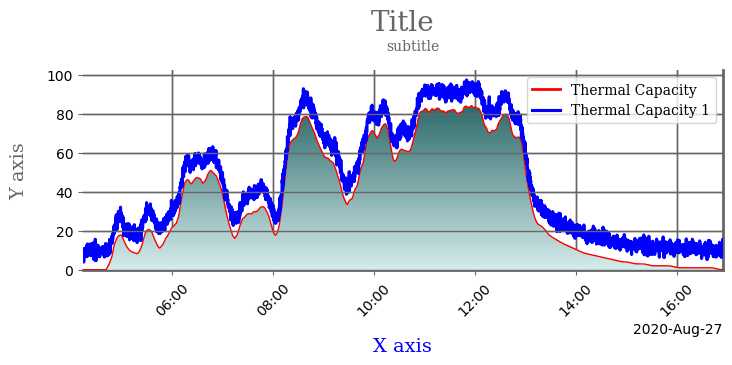

In [350]:
# Test class

c1=Chart(dict1)
iofile=c1.render()

with open('area_chart.png', mode='wb') as f:
    f.write(iofile)
